<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220528.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* GridSearchCV
* RFM

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotnine as gg
from plotnine import ggplot, aes
from datetime import datetime, date, time, timezone, timedelta 
import os 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA 
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, mean_squared_error
import sklearn.datasets as skd

# GridSearchCV

In [3]:
raw = skd.load_boston()
X = pd.DataFrame(raw['data'], columns = raw['feature_names'])
y = raw['target']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
x_tr, x_te, y_tr, y_te = train_test_split(X, y, train_size = .7)

In [6]:
scaler = StandardScaler()
x_tr_std = scaler.fit_transform(x_tr)
x_te_std = scaler.transform(x_te)

In [8]:
rf_fit = RandomForestRegressor().fit(x_tr_std, y_tr)
pred_rf = rf_fit.predict(x_te_std)

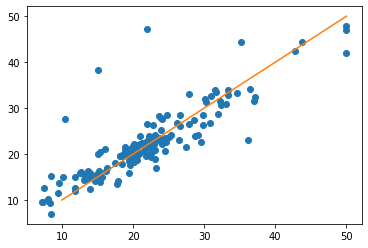

In [10]:
plt.plot(y_te, pred_rf, 'o')
plt.plot([10,50], [10,50])

In [11]:
rf_fit.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [28]:
params = {'n_estimators' : [10, 50, 100, 200],
          'min_samples_leaf' : [1, 3, 6, 10],
          'min_samples_split' : [2, 4, 8, 10],
          'max_depth' : [2, 6, 10]
          }

In [29]:
fit_grid = GridSearchCV(rf_fit, param_grid = params ,                         
                        #scoring = 'accuracy', 
                        n_jobs = -1, verbose = 1)

In [30]:
fit_grid.fit(x_tr_std, y_tr)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 6, 10],
                         'min_samples_leaf': [1, 3, 6, 10],
                         'min_samples_split': [2, 4, 8, 10],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=1)

In [31]:
fit_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [45]:
tbl_res = pd.DataFrame(np.c_[np.array( fit_grid.cv_results_['params']).reshape(-1,1), np.array( fit_grid.cv_results_['mean_test_score']).reshape(-1,1)],
             columns = ['params', 'score']
             ).sort_values(['score'], ascending = 0)
tbl_res

,params,score
131,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.861456
133,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.859635
137,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.858062
129,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.856332
135,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.855264
...,...,...
44,"{'max_depth': 2, 'min_samples_leaf': 6, 'min_s...",0.74384
32,"{'max_depth': 2, 'min_samples_leaf': 6, 'min_s...",0.742605
8,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.739103
52,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_...",0.731553


In [46]:
fit_rf_best = RandomForestRegressor(max_depth = 10, min_samples_leaf = 1, 
                                     min_samples_split = 2, n_estimators = 200).fit(x_tr_std, y_tr)                                     

In [48]:
pred_rf_best = fit_rf_best.predict(x_te_std)

In [49]:
mean_squared_error(y_te, pred_rf), mean_squared_error(y_te, pred_rf_best)

(17.993123171052638, 16.83303100621308)

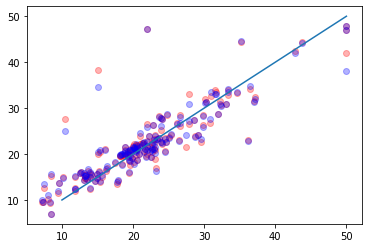

In [52]:
plt.plot(y_te, pred_rf, 'o', color = 'red', alpha = .3)
plt.plot(y_te, pred_rf_best, 'o', color = 'blue', alpha = .3)
plt.plot([10,50], [10,50])

# RFM

In [72]:
df = pd.read_csv('ecommerce-data.csv', encoding = 'unicode_escape')
df.columns = [a.lower() for a in df.columns]
df.invoicedate = pd.to_datetime(df.invoicedate)
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [76]:
df = df[~df.invoiceno.str.contains(r'^C')]

In [77]:
df = df[(df.invoicedate.dt.year == 2011) & (df.country == 'United Kingdom')]
df = df[['customerid', 'invoicedate', 'quantity', 'unitprice']]
df = df.sort_values(['customerid', 'invoicedate'], ascending = [1, 0])
df.head()

,customerid,invoicedate,quantity,unitprice
61619,12346.0,2011-01-18 10:01:00,74215,1.04
534566,12747.0,2011-12-07 14:34:00,36,6.75
534567,12747.0,2011-12-07 14:34:00,10,2.08
534568,12747.0,2011-12-07 14:34:00,24,1.65
534569,12747.0,2011-12-07 14:34:00,10,2.08


In [85]:
df['date'] = df.invoicedate.to_numpy().astype('datetime64[D]')
df['price'] = df['quantity'] * df['unitprice']
df.head()

,customerid,invoicedate,quantity,unitprice,date,price
61619,12346.0,2011-01-18 10:01:00,74215,1.04,2011-01-18,77183.6
534566,12747.0,2011-12-07 14:34:00,36,6.75,2011-12-07,243.0
534567,12747.0,2011-12-07 14:34:00,10,2.08,2011-12-07,20.8
534568,12747.0,2011-12-07 14:34:00,24,1.65,2011-12-07,39.6
534569,12747.0,2011-12-07 14:34:00,10,2.08,2011-12-07,20.8


In [89]:
now_date = datetime.strptime('2011-01-01', '%Y-%m-%d')

In [93]:
info_r = df.groupby('customerid')['date'].max()
info_f = df.groupby('customerid')['date'].size()
info_m = df.groupby('customerid')['price'].sum()
info_rd = df.groupby('customerid')['date'].apply(lambda x : x.max() - now_date + np.timedelta64(1, 'D')).dt.days

In [96]:
info = pd.concat([info_r, info_f, info_m, info_rd], axis = 1).reset_index()
info.columns = ['customerid', 'redency', 'freq', 'money', 'redency_day']
info.head()

,customerid,redency,freq,money,redency_day
0,12346.0,2011-01-18,1,77183.60,18
1,12747.0,2011-12-07,88,3489.74,341
2,12748.0,2011-12-09,3928,29491.60,343
3,12749.0,2011-12-06,199,4090.88,340
4,12820.0,2011-12-06,59,942.34,340


In [125]:
q_f = info['freq'].quantile([.2, .4, .6, .8])
q_m = info['money'].quantile([.2, .4, .6, .8])
q_r = info['redency_day'].quantile([.2, .4, .6, .8]).sort_values(ascending = False)
q_r.index = [1,2,3,4]
q_m.index = [1,2,3,4]
q_f.index = [1,2,3,4]


In [147]:
q_info = pd.concat([q_r, q_f, q_m], axis = 1)
q_info.columns = ['r', 'f', 'm']
q_info.insert(0, 'num', [2,3,4,5])
q_info

,num,r,f,m
1,2,331.0,13.0,232.552
2,3,312.0,28.0,453.444
3,4,277.0,56.0,871.250
4,5,179.6,115.0,1863.946


In [148]:
q_info = pd.melt(q_info, id_vars = 'num', var_name = 'rfm')
q_info.head()

,num,rfm,value
0,2,r,331.0
1,3,r,312.0
2,4,r,277.0
3,5,r,179.6
4,2,f,13.0


In [150]:
 q_info['rank'] = q_info['rfm'] + q_info['num'].astype('str')
 q_info = q_info[['rfm','rank', 'value']]
 q_info.head()

,rfm,rank,value
0,r,r2,331.0
1,r,r3,312.0
2,r,r4,277.0
3,r,r5,179.6
4,f,f2,13.0
